In [54]:
import numpy as np
import pandas as pd

from plotnine import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
import plotly.express as px

colors = sns.color_palette("bright", 10)

sns.set_style("whitegrid")

In [55]:
time = np.arange(1, 10000)

# mean
mean_baseline = 0.0003
mean_stratified4 = 0.0016
mean_stratified3 = 0.0006
mean_stratified1 = 0.0046

# parameters

alpha1_mean_str3 = 0.4917
alpha1_lower_str3 = 0.0869
alpha1_upper_str3 = 0.9895

alpha_2_mean = 0.41
alpha_2_lower = 0.0264 
alpha_2_upper = 0.9192


alpha_3_mean = 0.5531 
alpha_3_lower = 0.1281
alpha_3_upper = 1


# 95% HDI 
upper_baseline, lower_baseline = 0.0004, 0.0001 
upper_stratified4, lower_stratified4 = 0.0038, 0.0002
upper_stratified3, lower_stratified3 = 0.0014, 0.0002
upper_stratified1, lower_stratified1 = 0.0133, 0.0003


# proba
prob_baseline = 1 - (1 - mean_baseline)**time

prob_stratified1 = 1 - (1 - mean_stratified1)**time

prob_stratified4_1 = 1 - (1 - mean_stratified4)**time

prob_stratified4_2 = 1 - (1 - alpha_2_mean * mean_stratified4)**time

prob_stratified4_3 = 1 - (1 - alpha_2_mean * alpha_3_mean * mean_stratified4)**time

Text(0, 0.5, 'transmission probability (P)')

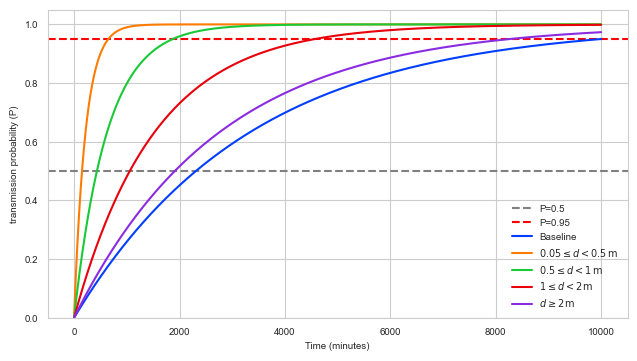

In [56]:
width_mm = 190
width_inch = width_mm / 25.4

# Set height proportionally (assuming aspect ratio, adjust as needed)
height_inch = 4  # Example height

# Set the figure size in inches
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Set the font size to 7 points
plt.rcParams.update({'font.size': 7})

ax.set_ylim([0, 1.05])
# ax.set_xscale('log')

# Store legend handles and labels
legend_handles = []
legend_labels = []

# Add horizontal reference lines first (these will be regular legend entries)
h1 = ax.axhline(0.5, color='gray', linestyle='--', label='P=0.5')
h2 = ax.axhline(0.95, color='red', linestyle='--', label='P=0.95')
legend_handles.extend([h1, h2])
legend_labels.extend(['P=0.5', 'P=0.95'])


# curve for baseline no distance
p1, = ax.plot(time, prob_baseline,  color=colors[0], label='Baseline')


legend_labels.append('Baseline')

# curve for distance 0.05 m < d < 0.5 m
p3, = ax.plot(time, prob_stratified1,  color=colors[1], label='$0.05 \leq d <0.5\, \mathrm{m}$')


# curve for distance 0.5 m < d <1 m
p5, = ax.plot(time, prob_stratified4_1,  color=colors[2], label='$0.5 \leq d <1\, \mathrm{m}$')



# curve for distance 1 m < d < 2 m
p7, = ax.plot(time, prob_stratified4_2, color=colors[3], label='$1 \leq d <2 \,\mathrm{m}$')


# curve for distance d > 2 m
p9, = ax.plot(time, prob_stratified4_3, color=colors[4], label='$d \geq 2 \,\mathrm{m}$')



def find_intersections(prob_curve, time_array, thresholds=(0.5, 0.95)):
    intersections = {}
    for thresh in thresholds:
        idx = np.argmin(np.abs(prob_curve - thresh))
        intersections[thresh] = time_array[idx]
    return intersections



# Create the legend with combined entries
plt.legend( loc=4,  frameon=False)

plt.xlabel('Time (minutes)')
plt.ylabel('transmission probability (P)')



In [57]:
fig.savefig('mean_exposure_2.tiff', dpi=350, format='tiff', bbox_inches='tight') 

Text(0, 0.5, 'transmission probability (P)')

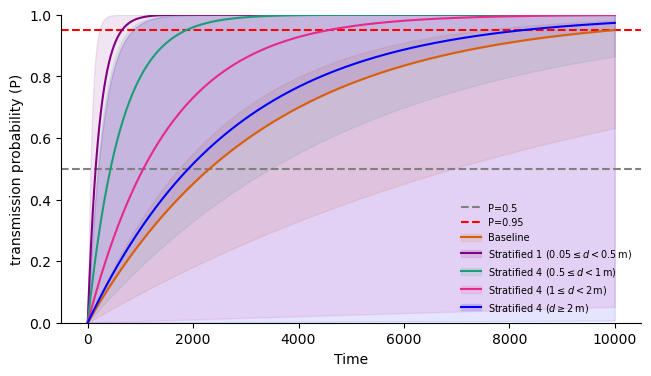

In [ ]:
width_mm = 190
width_inch = width_mm / 25.4

# Set height proportionally (assuming aspect ratio, adjust as needed)
height_inch = 4  # Example height

# Set the figure size in inches
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Set the font size to 7 points
plt.rcParams.update({'font.size': 7})

ax.set_ylim([0, 1])
# ax.set_xscale('log')

# Store legend handles and labels
legend_handles = []
legend_labels = []

# Add horizontal reference lines first (these will be regular legend entries)
h1 = ax.axhline(0.5, color='gray', linestyle='--')
h2 = ax.axhline(0.95, color='red', linestyle='--')
legend_handles.extend([h1, h2])
legend_labels.extend(['P=0.5', 'P=0.95'])

# Use Dark2 palette for better colors
colors = sns.color_palette("Dark2", n_colors=10)

# curve for baseline no distance
p1, = ax.plot(time, prob_baseline,  color=colors[1])
p2 = ax.fill_between(time, 
                1 - (1 - lower_baseline)**time, 
                1 - (1 - upper_baseline)**time,
                alpha=0.1, color=colors[1])
legend_handles.append((p1, p2))  # Tuple for combined legend entry
legend_labels.append('Baseline')

# curve for distance 0.05 m < d < 0.5 m
p3, = ax.plot(time, prob_stratified1,  color="purple")
p4 = ax.fill_between(time, 
                1 - (1 - lower_stratified1)**time, 
                1 - (1 - upper_stratified1)**time,
                alpha=0.1, color="purple")
legend_handles.append((p3, p4))
legend_labels.append('Stratified 1 ($0.05 \leq d <0.5\, \mathrm{m}$)')

# curve for distance 0.5 m < d <1 m
p5, = ax.plot(time, prob_stratified4_1,  color=colors[0])
p6 = ax.fill_between(time, 
                1 - (1 - lower_stratified4)**time, 
                1 - (1 - upper_stratified4)**time,
                alpha=0.1, color=colors[0])
legend_handles.append((p5, p6))
legend_labels.append(r'Stratified 4 ($0.5 \leq d < 1\,\mathrm{m}$)')

# curve for distance 1 m < d < 2 m
p7, = ax.plot(time, prob_stratified4_2, color=colors[3])
p8 = ax.fill_between(time, 
                1 - (1 - alpha_2_lower * lower_stratified4)**time, 
                1 - (1 - alpha_2_upper * upper_stratified4)**time,
                alpha=0.1, color=colors[3])
legend_handles.append((p7, p8))
legend_labels.append('Stratified 4 ($1 \leq d <2 \,\mathrm{m}$) ')

# curve for distance d > 2 m
p9, = ax.plot(time, prob_stratified4_3, color="blue")
p10 = ax.fill_between(time, 
                1 - (1 - alpha_2_lower * alpha_3_lower * lower_stratified4)**time, 
                1 - (1 - alpha_2_upper * alpha_3_upper *  upper_stratified4)**time,
                alpha=0.1, color="blue")
legend_handles.append((p9, p10))
legend_labels.append('Stratified 4 ($d \geq 2 \,\mathrm{m}$)')

# Style improvements
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

def find_intersections(prob_curve, time_array, thresholds=(0.5, 0.95)):
    intersections = {}
    for thresh in thresholds:
        idx = np.argmin(np.abs(prob_curve - thresh))
        intersections[thresh] = time_array[idx]
    return intersections



# Create the legend with combined entries
plt.legend(legend_handles, legend_labels, loc=4, bbox_to_anchor=(0.5, 0., 0.5, 0.5), frameon=False)

plt.xlabel('Time')
plt.ylabel('transmission probability (P)')



In [5]:
fig.savefig('mean_exposure_1.tiff', dpi=350, format='tiff', bbox_inches='tight') 

In [ ]:
def find_intersections(prob_curve, time_array, thresholds=(0.5, 0.95)):
    intersections = {}
    for thresh in thresholds:
        idx = np.argmin(np.abs(prob_curve - thresh))
        intersections[thresh] = time_array[idx]
    return intersections

# --- Switch upper and lower for HDI ---
switched_upper_baseline, switched_lower_baseline = upper_baseline, lower_baseline
switched_upper_stratified4, switched_lower_stratified4 = upper_stratified4, lower_stratified4
switched_upper_stratified3, switched_lower_stratified3 = upper_stratified3, lower_stratified3
switched_upper_stratified1, switched_lower_stratified1 = upper_stratified1, lower_stratified1

results = {}

# Baseline
results['Baseline'] = {
    'mean': find_intersections(prob_baseline, time),
    'lower': find_intersections(1 - (1 - switched_lower_baseline)**time, time),
    'upper': find_intersections(1 - (1 - switched_upper_baseline)**time, time)
}

# Stratified 1 (0.05 ≤ d < 0.5 m)
results['Stratified 1 (0.05-0.5m)'] = {
    'mean': find_intersections(prob_stratified1, time),
    'lower': find_intersections(1 - (1 - switched_lower_stratified1)**time, time),
    'upper': find_intersections(1 - (1 - switched_upper_stratified1)**time, time)
}

# Stratified 4 (0.5 ≤ d < 1 m)
results['Stratified 4 (0.5-1m)'] = {
    'mean': find_intersections(prob_stratified4_1, time),
    'lower': find_intersections(1 - (1 - switched_lower_stratified4)**time, time),
    'upper': find_intersections(1 - (1 - switched_upper_stratified4)**time, time)
}

# Stratified 4 (1 ≤ d < 2 m)
results['Stratified 4 (1-2m)'] = {
    'mean': find_intersections(prob_stratified4_2, time),
    'lower': find_intersections(1 - (1 - alpha_2_lower * switched_lower_stratified4)**time, time),
    'upper': find_intersections(1 - (1 - alpha_2_upper * switched_upper_stratified4)**time, time)
}

# Stratified 4 (d ≥ 2 m)
results['Stratified 4 (≥2m)'] = {
    'mean': find_intersections(prob_stratified4_3, time),
    'lower': find_intersections(1 - (1 - alpha_2_lower * alpha_3_lower * switched_lower_stratified4)**time, time),
    'upper': find_intersections(1 - (1 - alpha_2_upper * alpha_3_upper * switched_upper_stratified4)**time, time)
}

# Print results
for label, res in results.items():
    print(f"\n{label}:")
    for key in ['mean', 'lower', 'upper']:
        print(f"  {key}:")
        for thresh, tval in res[key].items():
            print(f"    y={thresh}: x={tval} min")
plt.show()





Baseline:
  mean:
    y=0.5: x=2310 min
    y=0.95: x=9984 min
  lower:
    y=0.5: x=6931 min
    y=0.95: x=29956 min
  upper:
    y=0.5: x=1733 min
    y=0.95: x=7488 min

Stratified 1 (0.05-0.5m):
  mean:
    y=0.5: x=150 min
    y=0.95: x=650 min
  lower:
    y=0.5: x=2310 min
    y=0.95: x=9984 min
  upper:
    y=0.5: x=52 min
    y=0.95: x=224 min

Stratified 4 (0.5-1m):
  mean:
    y=0.5: x=433 min
    y=0.95: x=1871 min
  lower:
    y=0.5: x=3465 min
    y=0.95: x=14977 min
  upper:
    y=0.5: x=182 min
    y=0.95: x=787 min

Stratified 4 (1-2m):
  mean:
    y=0.5: x=1056 min
    y=0.95: x=4565 min
  lower:
    y=0.5: x=131278 min
    y=0.95: x=567372 min
  upper:
    y=0.5: x=198 min
    y=0.95: x=856 min

Stratified 4 (≥2m):
  mean:
    y=0.5: x=1910 min
    y=0.95: x=8255 min
  lower:
    y=0.5: x=599999 min
    y=0.95: x=599999 min
  upper:
    y=0.5: x=198 min
    y=0.95: x=856 min


In [12]:
# Calculate x (time) when y = 0.5 and y = 0.95 for each model using the closed-form solution
# y = 1 - (1 - p)^x  =>  x = log(1 - y) / log(1 - p)

def solve_x(p, y):
    # Avoid log(0) and negative/zero p
    if p <= 0 or p >= 1 or y >= 1 or y <= 0:
        return float('nan')
    return np.log(1 - y) / np.log(1 - p)

thresholds = [0.5, 0.95]

models = {
    "Baseline": mean_baseline,
    "Stratified 1 (0.05 ≤ d < 0.5 m)": mean_stratified1,
    "Stratified 4 (0.5 ≤ d < 1 m)": mean_stratified4,
    "Stratified 4 (1 ≤ d < 2 m)": alpha_2_mean * mean_stratified4,
    "Stratified 4 (d ≥ 2 m)": alpha_2_mean * alpha_3_mean * mean_stratified4
}

results_calc = {}

for model, p in models.items():
    results_calc[model] = {}
    for y in thresholds:
        x = solve_x(p, y)
        results_calc[model][f"x@P={y}"] = x

# Print results
for model, vals in results_calc.items():
    print(f"{model}:")
    for label, x in vals.items():
        print(f"  {label}: {x:.2f} min")



# Also compute for lower and upper bounds for each model if available
bounds = {
    "Baseline": (lower_baseline, upper_baseline),
    "Stratified 1 (0.05 ≤ d < 0.5 m)": (lower_stratified1, upper_stratified1),
    "Stratified 4 (0.5 ≤ d < 1 m)": (lower_stratified4, upper_stratified4),
    "Stratified 4 (1 ≤ d < 2 m)": (alpha_2_lower * lower_stratified4, alpha_2_upper * upper_stratified4),
    "Stratified 4 (d ≥ 2 m)": (alpha_2_lower * alpha_3_lower * lower_stratified4, alpha_2_upper * alpha_3_upper * upper_stratified4)
}

print("\nWith bounds (lower–upper):")
for model, p in models.items():
    lower_p, upper_p = bounds[model]
    for y in thresholds:
        x_lower = solve_x(lower_p, y)
        x_upper = solve_x(upper_p, y)
        print(f"{model} @P={y}: {x_lower:.2f}–{x_upper:.2f} min")

def format_time(val):
    if np.isnan(val):
        return "nan"
    if val < 60:
        return f"{val:.2f} min"
    else:
        hours = val / 60
        return f"{hours:.2f} h"

print("\nFormatted results (mean):")
for model, vals in results_calc.items():
    print(f"{model}:")
    for label, x in vals.items():
        print(f"  {label}: {format_time(x)}")

print("\nFormatted results (lower–upper):")
for model, p in models.items():
    lower_p, upper_p = bounds[model]
    for y in thresholds:
        x_lower = solve_x(lower_p, y)
        x_upper = solve_x(upper_p, y)
        print(f"{model} @P={y}: {format_time(x_lower)}–{format_time(x_upper)}")


# Create a DataFrame for Plotly
data = {
    "Model": [],
    "Threshold": [],
    "Time (min)": []
}

for model, vals in results_calc.items():
    for label, x in vals.items():
        threshold = label.split('@')[-1].strip()
        data["Model"].append(model)
        data["Threshold"].append(threshold)
        data["Time (min)"].append(x)
df = pd.DataFrame(data)
# Create the Plotly bar chart
fig = px.bar(df, x="Model", y="Time (min)", color="Threshold", barmode='group',
             title="Exposure Time to Reach Transmission Probability Thresholds",
             labels={"Time (min)": "Time (min)", "Model": "Model", "Threshold": "Threshold"})
fig.update_layout(xaxis_title="Model", yaxis_title="Time (min)",
                  legend_title_text="Threshold",
                  xaxis_tickangle=-45)
fig.show()

Baseline:
  x@P=0.5: 2310.14 min
  x@P=0.95: 9984.28 min
Stratified 1 (0.05 ≤ d < 0.5 m):
  x@P=0.5: 150.34 min
  x@P=0.95: 649.75 min
Stratified 4 (0.5 ≤ d < 1 m):
  x@P=0.5: 432.87 min
  x@P=0.95: 1870.83 min
Stratified 4 (1 ≤ d < 2 m):
  x@P=0.5: 1056.28 min
  x@P=0.95: 4565.17 min
Stratified 4 (d ≥ 2 m):
  x@P=0.5: 1910.03 min
  x@P=0.95: 8254.99 min

With bounds (lower–upper):
Baseline @P=0.5: 6931.13–1732.52 min
Baseline @P=0.95: 29955.82–7487.83 min
Stratified 1 (0.05 ≤ d < 0.5 m) @P=0.5: 2310.14–51.77 min
Stratified 1 (0.05 ≤ d < 0.5 m) @P=0.95: 9984.28–223.74 min
Stratified 4 (0.5 ≤ d < 1 m) @P=0.5: 3465.39–182.06 min
Stratified 4 (0.5 ≤ d < 1 m) @P=0.95: 14977.16–786.85 min
Stratified 4 (1 ≤ d < 2 m) @P=0.5: 131277.53–198.09 min
Stratified 4 (1 ≤ d < 2 m) @P=0.95: 567372.04–856.15 min
Stratified 4 (d ≥ 2 m) @P=0.5: 1024807.42–198.09 min
Stratified 4 (d ≥ 2 m) @P=0.95: 4429143.99–856.15 min

Formatted results (mean):
Baseline:
  x@P=0.5: 38.50 h
  x@P=0.95: 166.40 h
Stratified

# Stratified 1 only estimation of exposure time

In [ ]:
time = np.arange(1, 500000)

# Mean probability for p (example)
p_mean = 0.0046 
p_lower = 0.0003
p_upper = 0.0133

# Alpha values (example)
alpha_1_mean = 0.3764
alpha_2_mean = 0.5064
alpha_3_mean = 0.5879

# Lower and upper bounds for alphas
alpha_1_lower = 0.014
alpha_1_upper = 0.9012
alpha_2_lower = 0.1092
alpha_2_upper = 0.9973
alpha_3_lower = 0.1586
alpha_3_upper = 0.9999


# Baseline

mean_baseline = 0.0003
upper_baseline, lower_baseline = 0.0004, 0.0001 

prob_baseline = 1 - (1 - mean_baseline)**time


# Function to compute p_i and its bounds based on which distance is fixed
def compute_p_i_bounds(time, fixed_segment):
    if fixed_segment == '0.05_0.5':  # Time between 0.05 and 0.5 (t0)
        p_i_mean = 1 - (1 - p_mean) ** time
        p_i_lower = 1 - (1 - p_lower) ** time
        p_i_upper = 1 - (1 - p_upper) ** time
    elif fixed_segment == '0.5_1':  # Time between 0.5 and 1 (t1)
        p_i_mean = 1 - (1 - alpha_1_mean * p_mean) ** time
        p_i_lower = 1 - (1 - alpha_1_lower * p_lower) ** time
        p_i_upper = 1 - (1 - alpha_1_upper * p_upper) ** time
    elif fixed_segment == '1_2':  # Time between 1 and 2 (t2)
        p_i_mean = 1 - (1 - alpha_1_mean * alpha_2_mean * p_mean) ** time
        p_i_lower = 1 - (1 - alpha_1_lower * alpha_2_lower * p_lower) ** time
        p_i_upper = 1 - (1 - alpha_1_upper * alpha_2_upper * p_upper) ** time
    elif fixed_segment == 'above_2':  # Time above 2 (t3)
        p_i_mean = 1 - (1 - alpha_1_mean * alpha_2_mean * alpha_3_mean * p_mean) ** time
        p_i_lower = 1 - (1 - alpha_1_lower * alpha_2_lower * alpha_3_lower * p_lower) ** time
        p_i_upper = 1 - (1 - alpha_1_upper * alpha_2_upper * alpha_3_upper * p_upper) ** time
    else:
        raise ValueError("Invalid fixed_segment provided. Choose from ['0.05_0.5', '0.5_1', '1_2', 'above_2'].")

    return p_i_mean, p_i_lower, p_i_upper
    

In [ ]:
# Example: Fix distance to time_between_0.05_and_0.5m
fixed_segment0 = '0.05_0.5'
p_i_mean0, p_i_lower0, p_i_upper0 = compute_p_i_bounds(time, fixed_segment0)

# Example: Fix distance to time_between_0.5_and_1m
fixed_segment1 = '0.5_1'
p_i_mean1, p_i_lower1, p_i_upper1 = compute_p_i_bounds(time, fixed_segment1)

# Example: Fix distance to time_between_1_and_2m
fixed_segment2 = '1_2'
p_i_mean2, p_i_lower2, p_i_upper2 = compute_p_i_bounds(time, fixed_segment2)

# Example: Fix distance above 2m
fixed_segment3 = 'above_2'
p_i_mean3, p_i_lower3, p_i_upper3 = compute_p_i_bounds(time, fixed_segment3)

In [ ]:
width_mm = 190
width_inch = width_mm / 25.4

# Set height proportionally (assuming aspect ratio, adjust as needed)
height_inch = 4  # Example height

# Set the figure size in inches
fig, ax = plt.subplots(figsize=(width_inch, height_inch))

# Set the font size to 7 points
plt.rcParams.update({'font.size': 7})


ax.set_ylim([0, 1])


# ax.set_xscale('log')
ax.axhline(0.5, color='gray', linestyle='--', label= 'P=0.5')
ax.axhline(0.95, color='red', linestyle='--', label= 'P=0.95')


# Calculate the width of the confidence interval (HDI range)
hdi_width0 = p_i_upper0 - p_i_lower0
hdi_width1 = p_i_upper1 - p_i_lower1
hdi_width2 = p_i_upper2 - p_i_lower2
hdi_width3 = p_i_upper3 - p_i_lower3

# Set transparency based on the width of the confidence interval
alpha0 = 0.3 if hdi_width0.max() < 0.5 else 0.1  # Adjust alpha based on CI width
alpha1 = 0.4 if hdi_width1.max() < 0.5 else 0.1
alpha2 = 0.1 if hdi_width2.max() < 0.5 else 0.05
alpha3 = 0.1 if hdi_width3.max() < 0.5 else 0.05


# curve for baseline no distance
ax.plot(time,  prob_baseline,  label='Baseline' , lw=2)

ax.plot(time, p_i_mean0,  lw =2, label= r"$ 0.05 \leq d < 0.5 \, \text{m}$")
ax.plot(time, p_i_mean1,  lw =2, label=r"$ 0.5 \leq d < 1 \, \text{m}$")
ax.plot(time, p_i_mean2,   lw =2, label=r"$ 1 \leq d < 2 \, \text{m}$")
ax.plot(time, p_i_mean3,  lw =2, label=r"$ d \geq 2 \, \text{m}$")



def find_intersections(prob_curve, time_array, thresholds=(0.5, 0.95)):
    intersections = {}
    for thresh in thresholds:
        idx = np.argmin(np.abs(prob_curve - thresh))
        intersections[thresh] = time_array[idx]
    return intersections

# Example usage for all four curves:
intersection_baseline = find_intersections(prob_baseline, time)
intersections0 = find_intersections(p_i_mean0, time)
intersections1 = find_intersections(p_i_mean1, time)
intersections2 = find_intersections(p_i_mean2, time)
intersections3 = find_intersections(p_i_mean3, time)


interUp0 = find_intersections(p_i_upper0, time)
interDown0 = find_intersections(p_i_lower0, time)
interUp1 = find_intersections(p_i_upper1, time)
interDown1 = find_intersections(p_i_lower1, time)
interUp2 = find_intersections(p_i_upper2, time)
interDown2 = find_intersections(p_i_lower2, time)
interUp3 = find_intersections(p_i_upper3, time)
interDown3 = find_intersections(p_i_lower3, time)


# Set white background for the plot
ax.set_facecolor('white')


plt.xlabel('Time (minutes)')
plt.ylabel(r'Probability ($P_i$)')
plt.legend()
plt.grid(True)
plt.show()




In [ ]:
# Function to format the intersection times with 95% HDI
def format_intersections(mean_dict, lower_dict, upper_dict):
    formatted = {}
    for thresh in mean_dict:
        mean_val = mean_dict[thresh]
        lower = lower_dict.get(thresh, float('nan'))
        upper = upper_dict.get(thresh, float('nan'))
        formatted[thresh] = f"{mean_val:.2f} ({lower:.2f}–{upper:.2f})"
    return formatted

# Format each stratified group
formatted0 = format_intersections(intersections0, interDown0, interUp0)
formatted1 = format_intersections(intersections1, interDown1, interUp1)
formatted2 = format_intersections(intersections2, interDown2, interUp2)
formatted3 = format_intersections(intersections3, interDown3, interUp3)

# Print the results
print("Intersection times (Stratified 1, 0.05 ≤ d < 0.5 m):")
for thresh, val in formatted0.items():
    print(f"Threshold {thresh}: Time = {val} minutes")

print("\nIntersection times (Stratified 2, 0.5 ≤ d < 1 m):")
for thresh, val in formatted1.items():
    print(f"Threshold {thresh}: Time = {val} minutes")

print("\nIntersection times (Stratified 3, 1 ≤ d < 2 m):")
for thresh, val in formatted2.items():
    print(f"Threshold {thresh}: Time = {val} minutes")

print("\nIntersection times (Stratified 4, d ≥ 2 m):")
for thresh, val in formatted3.items():
    print(f"Threshold {thresh}: Time = {val} minutes")


In [ ]:
def find_intersections(curve, time_array, thresholds=(0.5, 0.95)):
    intersections = {}
    for thresh in thresholds:
        idx = np.argmin(np.abs(curve - thresh))
        intersections[f't@{thresh}'] = time_array[idx]
    return intersections

# Compute for lower and upper bounds for each segment
segments = ['0 (0.05 ≤ d < 0.5)', '1 (0.5 ≤ d < 1)', '2 (1 ≤ d < 2)', '3 (d ≥ 2)']
data = []

for i, (lower, upper) in enumerate([
    (p_i_lower0, p_i_upper0),
    (p_i_lower1, p_i_upper1),
    (p_i_lower2, p_i_upper2),
    (p_i_lower3, p_i_upper3)
]):
    lower_inter = find_intersections(lower, time)
    upper_inter = find_intersections(upper, time)

    data.append({
        'Segment': segments[i],
        'Lower_t@0.5': lower_inter['t@0.5'],
        'Lower_t@0.95': lower_inter['t@0.95'],
        'Upper_t@0.5': upper_inter['t@0.5'],
        'Upper_t@0.95': upper_inter['t@0.95'],
    })

# Create DataFrame
df_intersections = pd.DataFrame(data)

# Export to CSV
df_intersections.to_csv("HDI_intersections_str1_new.csv", index=False)

print("CSV saved as HDI_intersections.csv")

In [ ]:
fig.savefig('C:/Users//manal/Downloads/Figure_9_str1.tiff', dpi=350, format='tiff', bbox_inches='tight') 
